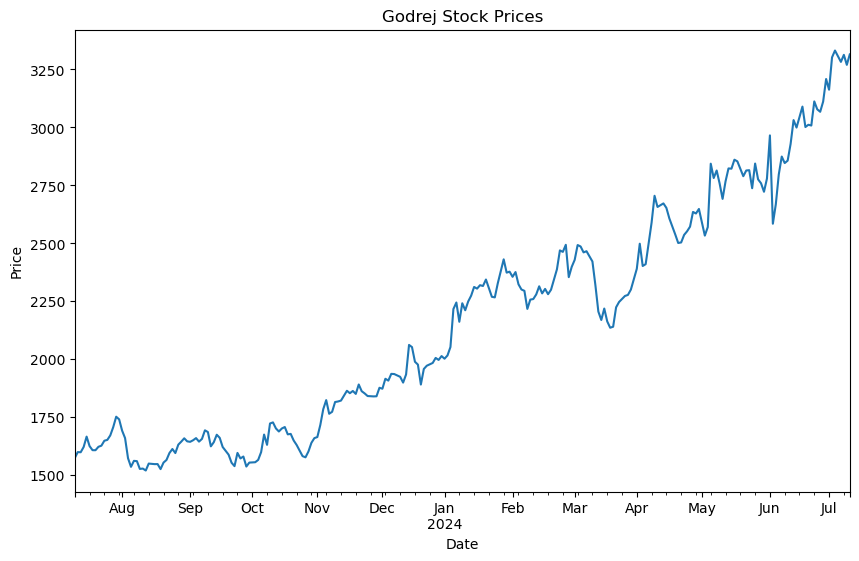

ADF Statistic: 0.7061395115979939
p-value: 0.9899596009927354


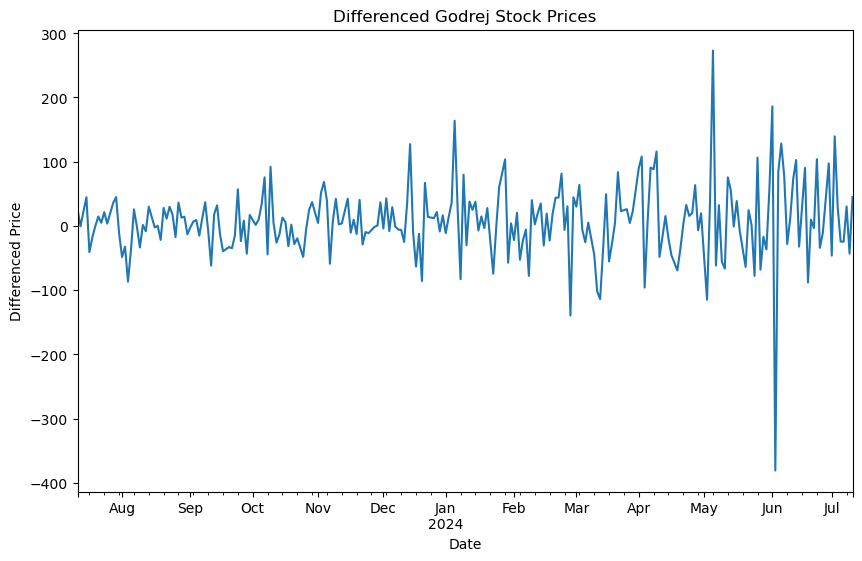

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load data
file_path = r'C:/Users/SANJUKTA/OneDrive/Documents/AI-ML/Project/GODREJPROP.NS.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Set the frequency of the date index to business days (B)
data.index = pd.DatetimeIndex(data.index).to_period('B')

# Plot the original data
data['Close'].plot(figsize=(10, 6))
plt.title('Godrej Stock Prices')
plt.ylabel('Price')
plt.show()

# Perform Dickey-Fuller test
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, data is non-stationary and needs differencing
if result[1] > 0.05:
    data['Close_diff'] = data['Close'].diff().dropna()
    data = data.dropna()  # Drop missing values after differencing

    # Plot differenced data
    data['Close_diff'].plot(figsize=(10, 6))
    plt.title('Differenced Godrej Stock Prices')
    plt.ylabel('Differenced Price')
    plt.show()
else:
    data['Close_diff'] = data['Close']

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                  245
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1334.957
Date:                Mon, 15 Jul 2024   AIC                           2675.915
Time:                        11:44:46   BIC                           2686.406
Sample:                    07-11-2023   HQIC                          2680.140
                         - 07-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1135      0.056     -2.039      0.041      -0.223      -0.004
ma.L1         -0.9994      0.248     -4.023      0.000      -1.486      -0.512
sigma2      3233.7973    769.411      4.203      0.0

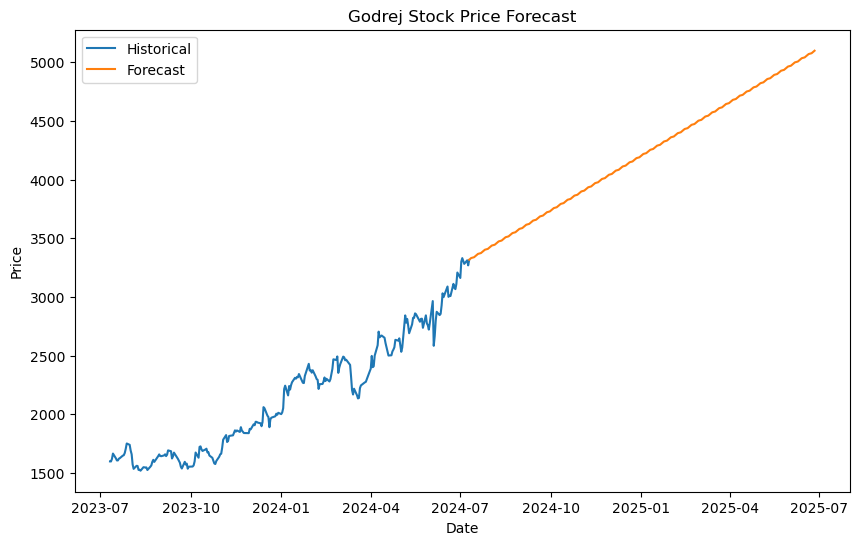

In [13]:
# Manually specify ARIMA parameters
order = (1, 1, 1)  # Adjust these parameters based on the data analysis

# Define and fit the ARIMA model with the chosen parameters
model = ARIMA(data['Close_diff'], order=order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast future stock prices for the next year (252 trading days)
forecast_steps = 252
forecast_diff = model_fit.forecast(steps=forecast_steps)

# Convert differenced forecast back to original scale
last_close = data['Close'].iloc[-1]
forecast = last_close + forecast_diff.cumsum()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index.to_timestamp(), data['Close'], label='Historical')
forecast_index = pd.date_range(start=data.index[-1].to_timestamp(), periods=forecast_steps, freq='B')
plt.plot(forecast_index, forecast, label='Forecast')
plt.title('Godrej Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the accuracy metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    n = len(y_train)
    d = np.sum(np.abs(np.diff(y_train))) / (n - 1)
    errors = np.abs(y_true - y_pred)
    return np.mean(errors / d)

# Example usage with some time series data
# Assuming `data` is your time series data
data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140]

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
y_pred = forecast

# Calculate accuracy metrics
mse = mean_squared_error(test, y_pred)
mape = mean_absolute_percentage_error(test, y_pred)
mase = mean_absolute_scaled_error(test, y_pred, train)

print(f"MSE: {mse}")
print(f"MAPE: {mape}%")
print(f"MASE: {mase}")


MSE: 500.7646269753435
MAPE: 14.129814395836052%
MASE: 1.5766754571455768
